Loadind dependencies.
by Anton Satalin

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Loading the file itself and showing it

In [2]:
appler=pd.read_csv('apple_quality.csv')
appler

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...,...
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


Changing quality to be numeric

In [3]:
cider=appler
cider["Quality"] = cider["Quality"].map({"bad": 0, "good": 1})
cider

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...,...
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


Looking for correlations

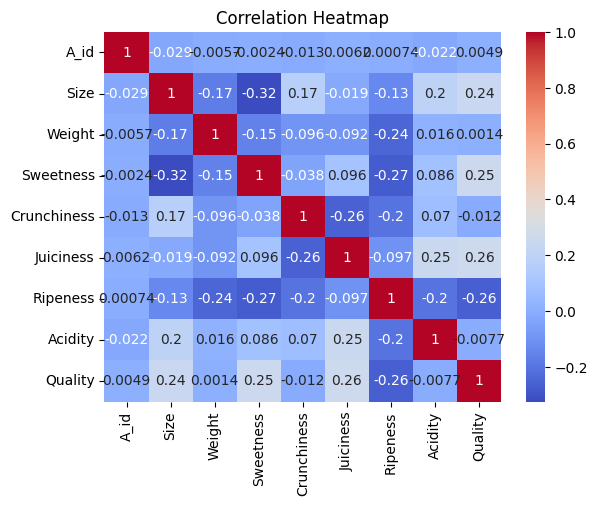

In [4]:
sns.heatmap(cider.corr(), annot=True, cmap="coolwarm" )
plt.title("Correlation Heatmap")
plt.show()

Decent negative correlation found between fruit size and it's sweetness,using that.

In [5]:
soda=cider[['Size','Sweetness']]
soda

,Size,Sweetness
0,-3.970049,5.346330
1,-1.195217,3.664059
2,-0.292024,-1.738429
3,-0.657196,1.324874
4,1.364217,-0.384658
...,...,...
3995,0.059386,-3.714549
3996,-0.293118,-0.204020
3997,-2.634515,-2.440461
3998,-4.008004,2.366397


Running the first K-means with deafult settings

In [6]:
km = KMeans(n_clusters=3)
aptree = km.fit_predict(soda)
aptree

c:\Users\Anton\Documents\GitHub\AnalysisGroup14\analyticsDep\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, ..., 0, 2, 1])

In [7]:
aptree[50:100]

array([2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1,
       1, 2, 0, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 2,
       0, 1, 0, 1, 0, 0])

Adding the result of knn back to the table

In [8]:
soda['knn']=aptree
soda

C:\Users\Anton\AppData\Local\Temp\ipykernel_23708\1689085823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soda['knn']=aptree


,Size,Sweetness,knn
0,-3.970049,5.346330,2
1,-1.195217,3.664059,2
2,-0.292024,-1.738429,0
3,-0.657196,1.324874,2
4,1.364217,-0.384658,1
...,...,...,...
3995,0.059386,-3.714549,0
3996,-0.293118,-0.204020,0
3997,-2.634515,-2.440461,0
3998,-4.008004,2.366397,2


Finding out how many clusters are present

In [9]:
soda.knn.unique()

array([2, 0, 1])

Assigning all clusters and showing it on the graph
Findings :
Smaller fruits are generally sweeter,bigger fruits are generally more bitter
Most of the fruits were of a similar size and sweetness ,with few exceptions (30 exceptions for 4000 samples)

Text(0.5, 1.0, 'K-Means Clustering')

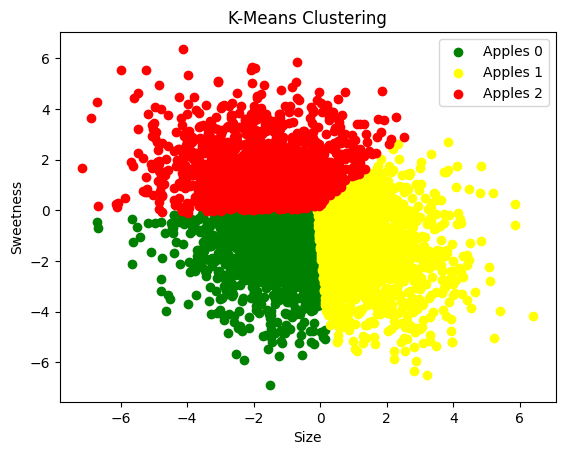

In [10]:
soda0=soda[soda.knn == 0]
soda1=soda[soda.knn == 1]
soda2=soda[soda.knn == 2]
plt.scatter(soda0['Size'], soda0['Sweetness'], color='green', label='Apples 0')
plt.scatter(soda1['Size'], soda1['Sweetness'], color='yellow', label='Apples 1')
plt.scatter(soda2['Size'], soda2['Sweetness'], color='red', label='Apples 2')
plt.xlabel('Size')
plt.ylabel('Sweetness')
plt.legend()
plt.title('K-Means Clustering')

In [11]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(soda)
    sse.append(km.inertia_)

c:\Users\Anton\Documents\GitHub\AnalysisGroup14\analyticsDep\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Anton\Documents\GitHub\AnalysisGroup14\analyticsDep\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Anton\Documents\GitHub\AnalysisGroup14\analyticsDep\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Anton\Documents\GitHub\AnalysisGroup14\analyticsDep\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto

Running the elbow method
8 clusters seems to be the smallest possible knn with minimal errors

Text(0.5, 1.0, 'Elbow Method for Optimal K')

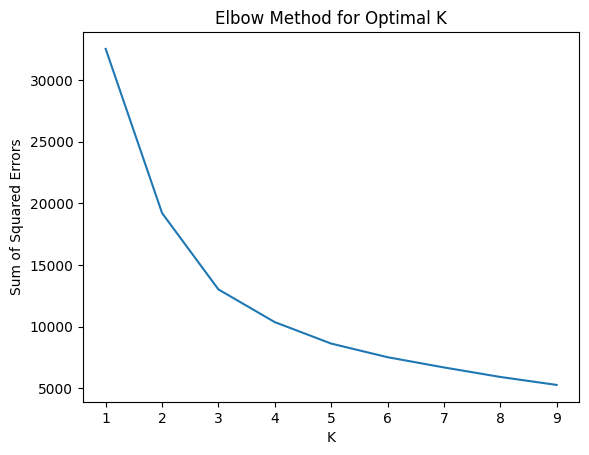

In [12]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Errors')
plt.plot(k_rng, sse)
plt.title('Elbow Method for Optimal K')

Trying out knn with 8 clusters

In [13]:
km1 = KMeans(n_clusters=8)
applepie=km1.fit_predict(soda)
applepie

c:\Users\Anton\Documents\GitHub\AnalysisGroup14\analyticsDep\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 5, 1, ..., 7, 4, 0])

In [14]:
soda['knn']=applepie
soda

C:\Users\Anton\AppData\Local\Temp\ipykernel_23708\4054848927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soda['knn']=applepie


,Size,Sweetness,knn
0,-3.970049,5.346330,4
1,-1.195217,3.664059,5
2,-0.292024,-1.738429,1
3,-0.657196,1.324874,2
4,1.364217,-0.384658,0
...,...,...,...
3995,0.059386,-3.714549,3
3996,-0.293118,-0.204020,1
3997,-2.634515,-2.440461,7
3998,-4.008004,2.366397,4


Now there are 8 clusters (0-7)

In [15]:
soda.knn.unique()

array([4, 5, 1, 2, 0, 7, 3, 6])

Doing the plot with 8 clusters.
Not really much changes,exept for 1st and 2nd cluster being in the middle.

Text(0.5, 1.0, 'K-Means Clustering , 8 clusters')

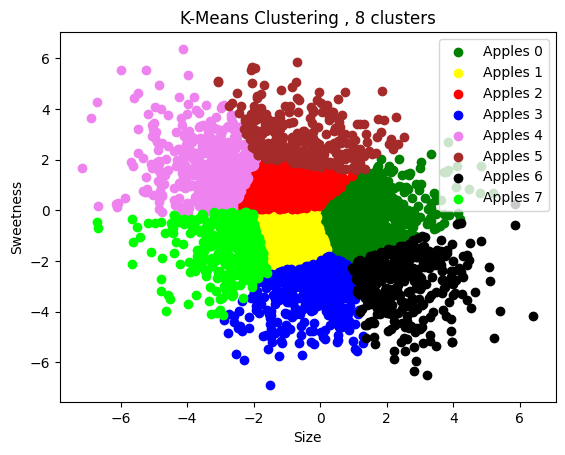

In [18]:
pie0=soda[soda.knn == 0]
pie1=soda[soda.knn == 1]
pie2=soda[soda.knn == 2]
pie3=soda[soda.knn == 3]
pie4=soda[soda.knn == 4]
pie5=soda[soda.knn == 5]
pie6=soda[soda.knn == 6]
pie7=soda[soda.knn == 7]
plt.scatter(pie0['Size'], pie0['Sweetness'], color='green', label='Apples 0')
plt.scatter(pie1['Size'], pie1['Sweetness'], color='yellow', label='Apples 1')
plt.scatter(pie2['Size'], pie2['Sweetness'], color='red', label='Apples 2')
plt.scatter(pie3['Size'], pie3['Sweetness'], color='blue', label='Apples 3')
plt.scatter(pie4['Size'], pie4['Sweetness'], color='violet', label='Apples 4')
plt.scatter(pie5['Size'], pie5['Sweetness'], color='brown', label='Apples 5')
plt.scatter(pie6['Size'], pie6['Sweetness'], color='black', label='Apples 6')
plt.scatter(pie7['Size'], pie7['Sweetness'], color='lime', label='Apples 7')
plt.xlabel('Size')
plt.ylabel('Sweetness')
plt.legend()
plt.title('K-Means Clustering , 8 clusters')

Use cases 
1.Farmers could pick out apples based on their size if they are looking for specific sweetness - bitter for cattle ,sweet for using.
2.Biologists could compare different apple tree species to find out which are better to grow in different climates, if they need sweet fruits, by comparing fruit size.